# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)


    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
# Display the first few rows of the dataframe
print(ames.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data
# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Display the first few rows of the cleaned dataframe
print("First few rows of the cleaned dataframe:")
print(ames_cleaned.head())

# Display concise summary of the cleaned dataframe
print("\nConcise summary of the cleaned dataframe:")
print(ames_cleaned.info())

First few rows of the cleaned dataframe:
    MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    AllPub   
2           20       RL     9600   Pave      Reg         Lvl    AllPub   
3           60       RL    11250   Pave      IR1         Lvl    AllPub   
4           70       RL     9550   Pave      IR1         Lvl    AllPub   
5           60       RL    14260   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                   ...                                       
1     Inside       Gtl      CollgCr  ...             0         0           0   
2        FR2       Gtl      Veenker  ...             0         0           0   
3     Inside       Gtl      CollgCr  ...             0         0           0   
4     Corner       Gtl      Crawfor  ...

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

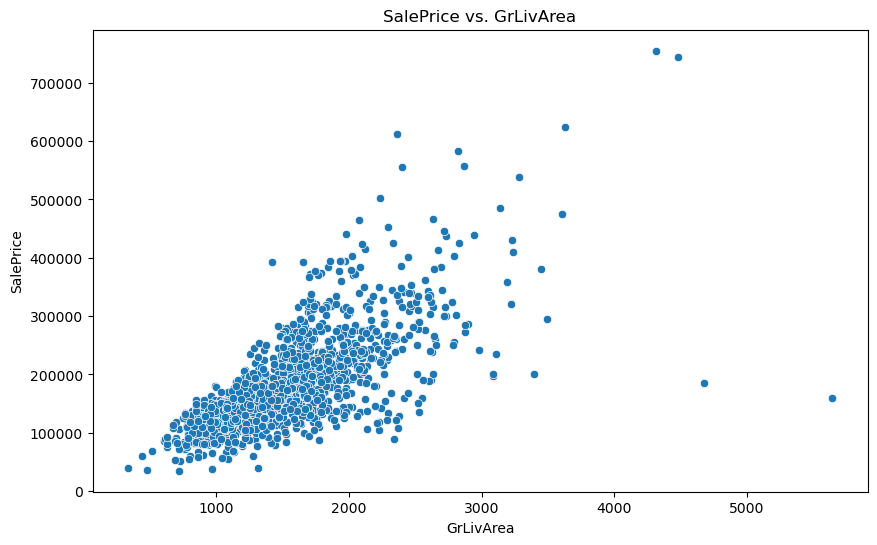

In [4]:
# Your code here - continuous numeric predictor
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous Numeric Predictor: GrLivArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=ames_cleaned)
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


### Discrete Numeric Predictor

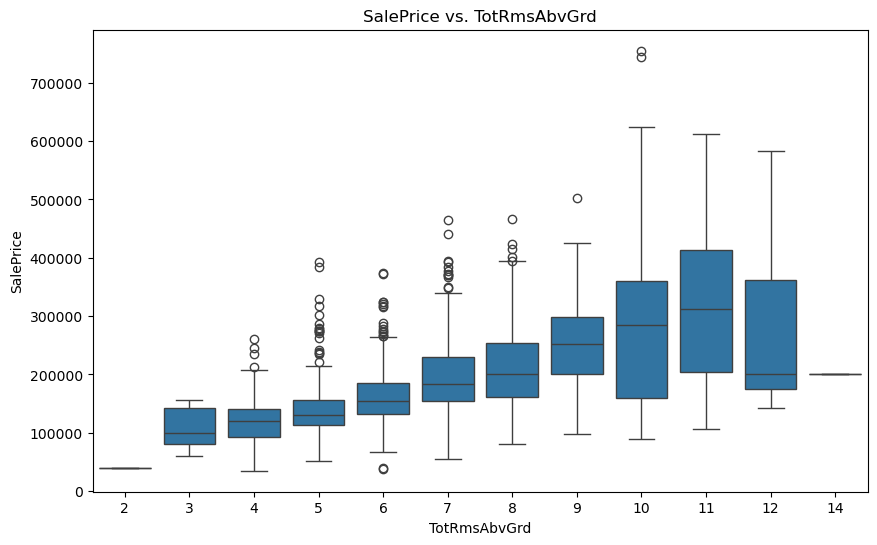

In [5]:
# Your code here - discrete numeric predictor
# Discrete Numeric Predictor: TotRmsAbvGrd
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=ames_cleaned)
plt.title('SalePrice vs. TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.show()


### String Categorical Predictor

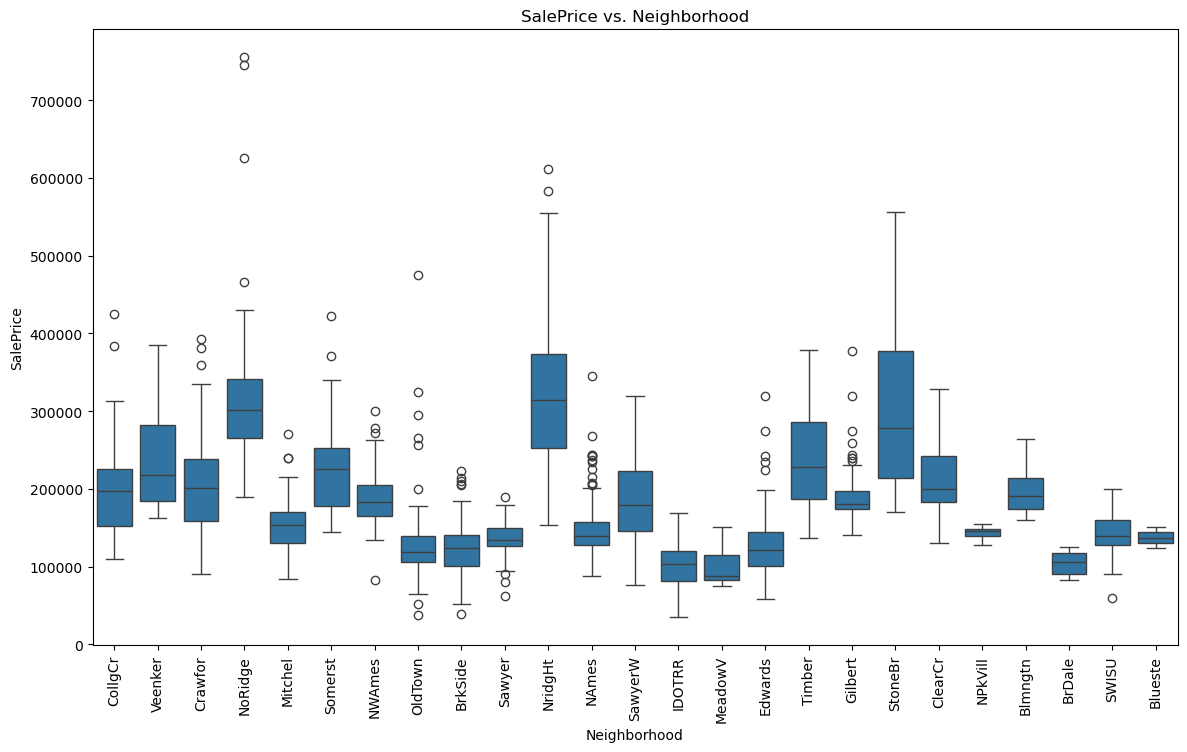

In [6]:
# Your code here - string categorical predictor
# String Categorical Predictor: Neighborhood
plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=ames_cleaned)
plt.title('SalePrice vs. Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()


### Discrete Categorical Predictor

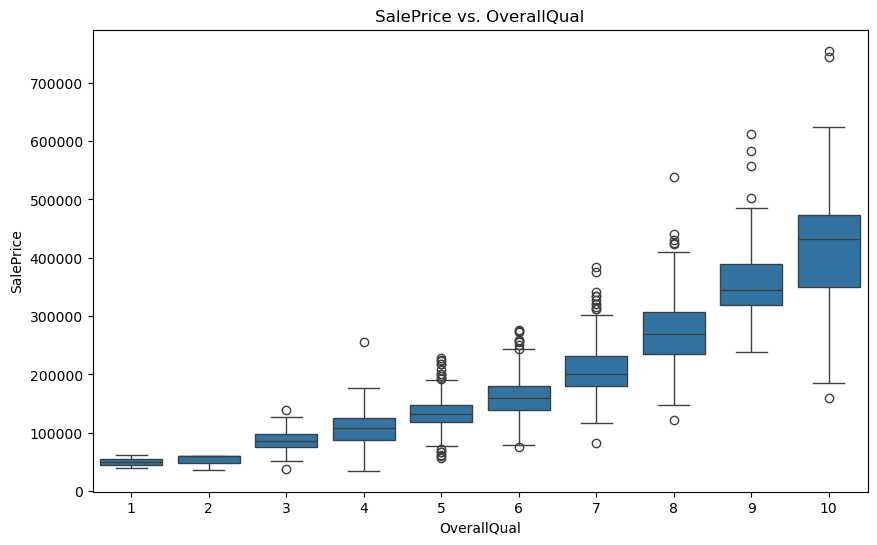

In [7]:
# Your code here - discrete categorical predictor
# Discrete Categorical Predictor: OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=ames_cleaned)
plt.title('SalePrice vs. OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [8]:
# Your code here - prepare X and y, including one-hot encoding
import pandas as pd

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)

# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Select the predictors and the target variable
predictors = ['GrLivArea', 'OverallQual', 'Neighborhood']
target = 'SalePrice'

# One-hot encode the categorical predictor
ames_encoded = pd.get_dummies(ames_cleaned[predictors], columns=['Neighborhood'], drop_first=True)

# Add the target variable to the encoded dataframe
ames_encoded[target] = ames_cleaned[target]

# Display the first few rows of the encoded dataframe
print("First few rows of the encoded dataframe:")
print(ames_encoded.head())


First few rows of the encoded dataframe:
    GrLivArea  OverallQual  Neighborhood_Blueste  Neighborhood_BrDale  \
Id                                                                      
1        1710            7                 False                False   
2        1262            6                 False                False   
3        1786            7                 False                False   
4        1717            7                 False                False   
5        2198            8                 False                False   

    Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
Id                                                                     
1                  False                 False                  True   
2                  False                 False                 False   
3                  False                 False                  True   
4                  False                 False                 False   
5              

In [9]:
# Your code here - build a regression model and display results
# Define the target variable
y = ames_encoded['SalePrice']

# Define the features
X = ames_encoded.drop(columns=['SalePrice'])

# Display the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1460, 26)
Target shape: (1460,)


## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [11]:
# Your code here - create partial regression plots
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display the model coefficients
print("Model Coefficients:", model.coef_)


X_train shape: (1168, 26)
X_test shape: (292, 26)
y_train shape: (1168,)
y_test shape: (292,)
Model Coefficients: [ 5.45053768e+01  2.05171659e+04 -3.21720145e+04 -4.49036528e+04
 -1.04579408e+04  3.57748935e+04  1.62011120e+04  1.61574217e+04
 -1.56309974e+04  3.09044721e+03 -2.56775947e+04 -1.73884480e+04
  5.21161887e+03 -1.67901149e+03 -1.29393432e+04 -1.59517782e+03
  6.28246835e+04  7.15784387e+04 -2.96981319e+04 -3.12409774e+04
  2.42805573e+03  2.99525399e+03  2.26699844e+04  7.07125428e+04
  3.20011117e+04  5.56636092e+04]


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [12]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R-squared: 0.8062757239759908
Mean Squared Error: 1485928391.35531


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [14]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)

# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Select the predictors and the target variable
predictors = ['GrLivArea', 'OverallQual', 'Neighborhood']
target = 'SalePrice'

# Define the target variable
y = ames_cleaned[target]

# Define the features
X = ames_cleaned[predictors]

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['GrLivArea', 'OverallQual']),
        ('cat', OneHotEncoder(drop='first'), ['Neighborhood'])
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Display the model coefficients
model = pipeline.named_steps['model']
print("Model Coefficients:", model.coef_)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


X_train shape: (1168, 3)
X_test shape: (292, 3)
y_train shape: (1168,)
y_test shape: (292,)
Model Coefficients: [ 28572.30574597  28047.58874774 -32172.12659012 -44904.46042169
 -10457.79925428  35774.41696637  16201.3521884   16157.37902134
 -15630.81068766   3090.70481475 -25675.82093016 -17387.90483014
   5211.56554905  -1678.84471132 -12939.30254238  -1594.99457098
  62824.19598644  71578.84020508 -29698.00574033 -31244.80662589
   2428.30743914   2996.21138501  22670.35681164  70710.21189967
  32002.55375306  55664.00701155]
R-squared: 0.8062758261878591
Mean Squared Error: 1485927607.3569381


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.